# Using Distancematrix

This is a standalone notebook exploring the possibility of using distancematrix or a similar API to get predicted journey times from collection to delivery.

Due to the limitations of the free API (1000 requests), it is not feasible to use this method on the provided test set.

Note that this is a quick experiment and no data cleaning has been performed beforehand.

In [7]:
import os
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv

In [8]:
load_dotenv()

True

In [21]:
API_KEY = os.getenv("DISTANCEMATRIX_API_KEY")
DISTANCEMATRIX_URL = os.getenv("DISTANCEMATRIX_URL")

In [22]:
DISTANCEMATRIX_URL

'https://api.distancematrix.ai/maps/api/distancematrix/json'

In [23]:
df = pd.read_csv("../data/training_data_with_lat_lon.csv")
df.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,...,LATEST_GPS_TIMESTAMP,DISTANCE,COLLECTION_DAY,DELIVERY_DAY,DELIVERY_HOUR,DELIVERY_WINDOW_DURATION,SHIPMENT_DURATION,DURATION_PER_DISTANCE,DELAYED,IS_VAN
0,66a23663-0195-46f2-a5e4-da256bcba47b,SEZHUK-231116-263345,CAUK001009,3.5TVan,LWB Van,CO4 9QJ,DE74 2TR,51.920887,0.927015,52.829374,...,2023-12-01 04:35:00+00:00,184.080096,Thursday,Thursday,22,1.0,4.666667,0.025351,1,0
1,2aac1ee1-5cab-42c8-9d2f-ec995a63c14f,SEZHUK-231215-274573,CAUK001047,TractorUnit,Curtain-Side 13.6M Trailer,GL16 8JB,S80 3EG,51.785961,-2.619676,53.295391,...,2023-12-17 21:36:00+00:00,198.282622,Sunday,Sunday,13,0.5,7.000000,0.035303,1,0
2,66a23663-0195-46f2-a5e4-da256bcba47b,SEZHUK-230925-247321,CAUK001009,3.5TVan,LWB Van,DE74 2TR,RG2 0RP,52.829374,-1.332134,51.432237,...,2023-10-03 07:32:00+01:00,157.269664,Tuesday,Tuesday,8,1.0,4.750000,0.030203,0,0
3,40415fe3-e446-4d1e-b141-3698b0dc47f3,SEZHUK-231211-272142,CAUK000096,TractorUnit,Curtain-Side 13.6M Trailer,ME6 5PX,IG11 0DS,51.324870,0.446613,51.515717,...,2023-12-13 13:20:00+00:00,32.103778,Tuesday,Tuesday,14,0.5,5.000000,0.155745,1,0
4,7369cda1-1d0c-42c5-be31-cf18efe77ddb,SEZHUK-231117-263891,CAUK000199,3.5TVan,LWB Van,LS11 5LX,DN31 3SW,53.767204,-1.547784,53.576337,...,2023-11-28 08:49:00+00:00,100.569459,Monday,Monday,8,0.5,2.000000,0.019887,1,0


In [24]:
df.columns

Index(['PROJECT_ID', 'SHIPMENT_NUMBER', 'CARRIER_DISPLAY_ID', 'VEHICLE_SIZE',
       'VEHICLE_BUILD_UP', 'FIRST_COLLECTION_POST_CODE',
       'LAST_DELIVERY_POST_CODE', 'FIRST_COLLECTION_LATITUDE',
       'FIRST_COLLECTION_LONGITUDE', 'LAST_DELIVERY_LATITUDE',
       'LAST_DELIVERY_LONGITUDE', 'FIRST_COLLECTION_SCHEDULE_EARLIEST',
       'FIRST_COLLECTION_SCHEDULE_LATEST', 'LAST_DELIVERY_SCHEDULE_EARLIEST',
       'LAST_DELIVERY_SCHEDULE_LATEST', 'LATEST_GPS_TIMESTAMP', 'DISTANCE',
       'COLLECTION_DAY', 'DELIVERY_DAY', 'DELIVERY_HOUR',
       'DELIVERY_WINDOW_DURATION', 'SHIPMENT_DURATION',
       'DURATION_PER_DISTANCE', 'DELAYED', 'IS_VAN'],
      dtype='object')

In [25]:
def get_request_params(row: pd.Series) -> dict:
    """Creates a dictionary of parameters for the Distance Matrix API request from a row in the dataframe."""
    params = {
        "origins": f"{row['FIRST_COLLECTION_LATITUDE']},{row['FIRST_COLLECTION_LONGITUDE']}",
        "destinations": f"{row['LAST_DELIVERY_LATITUDE']},{row['LAST_DELIVERY_LONGITUDE']}",
        "traffic_model": "optimistic",
        "key": API_KEY
    }
    return params


In [26]:
def get_api_response(params: dict) -> dict:
    """Makes a request to the Distance Matrix API and returns the response."""
    response = requests.get(DISTANCEMATRIX_URL, params=params)
    return response.json()

In [27]:
df["REQUEST_PARAMS"] = df.apply(get_request_params, axis=1)

In [28]:
df["REQUEST_PARAMS"][0]

{'origins': '51.920887,0.927015',
 'destinations': '52.829374,-1.332134',
 'traffic_model': 'optimistic',
 'key': '0bVbllVOOn3nT99qazMSzHK4xZd56CKNoaeCplj6lpq2tmRPlVMmrvbZSsbEL1Sj'}

In [29]:
# Get sample of 999 rows

sample = df.sample(999)

In [30]:
sample.index

Index([1302, 1685, 1437,  910, 2076, 2450, 1758, 2530, 2460, 2353,
       ...
       1031,  504, 2069, 2223,  590,  644, 1471,  327, 2465, 1544],
      dtype='int64', length=999)

In [31]:
sample.head()

,PROJECT_ID,SHIPMENT_NUMBER,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE,LAST_DELIVERY_LATITUDE,...,DISTANCE,COLLECTION_DAY,DELIVERY_DAY,DELIVERY_HOUR,DELIVERY_WINDOW_DURATION,SHIPMENT_DURATION,DURATION_PER_DISTANCE,DELAYED,IS_VAN,REQUEST_PARAMS
1302,eb7a9df0-4875-43d8-9060-c79c35eae2fb,SEZHUK-231022-255372,CAUK000766,TractorUnit,Box 44ft,BD5 8LZ,HP2 7PZ,53.763771,-1.739326,51.771839,...,238.381054,Thursday,Thursday,11,2.916944,9.433611,0.039574,0,0,"{'origins': '53.763771,-1.739326', 'destinatio..."
1685,bad2a1c4-4cf3-4157-864f-ce161784831f,SEZHUK-231113-262339,CAUK000222,TractorUnit,Curtain-Side 13.6M Trailer,L11 0JA,MK4 4BX,53.462845,-2.896967,51.992683,...,217.087376,Tuesday,Wednesday,11,0.500000,18.416667,0.084835,1,0,"{'origins': '53.462845,-2.896967', 'destinatio..."
1437,98d76108-ba01-441a-8425-641afdb920fb,SEZHUK-231106-260099,CAUK000940,TractorUnit,Box,S18 1PF,RG19 4BQ,53.304842,-1.482042,51.398689,...,212.785958,Thursday,Thursday,17,0.500000,4.500000,0.021148,0,0,"{'origins': '53.304842,-1.482042', 'destinatio..."
910,66a23663-0195-46f2-a5e4-da256bcba47b,SEZHUK-231102-258542,CAUK001009,3.5TVan,LWB Van,DE74 2TR,WS9 0SW,52.829374,-1.332134,52.593326,...,48.623506,Thursday,Thursday,10,3.000000,6.500000,0.133680,1,0,"{'origins': '52.829374,-1.332134', 'destinatio..."
2076,2aac1ee1-5cab-42c8-9d2f-ec995a63c14f,SEZHUK-231228-277303,CAUK000222,TractorUnit,Curtain-Side 13.6M Trailer,GL3 4AJ,S80 3EG,51.843233,-2.170887,53.295391,...,178.100755,Friday,Saturday,5,0.500000,6.000000,0.033689,1,0,"{'origins': '51.843233,-2.170887', 'destinatio..."


In [32]:
sample["API_RESPONSE"] = sample["REQUEST_PARAMS"].apply(get_api_response)
sample.to_csv("../data/sample_with_api_response.csv", index=False)

In [36]:
sample["API_RESPONSE"].iloc[0]

{'destination_addresses': ['1 Finway Rd, Hemel Hempstead HP2 7PT, UK'],
 'origin_addresses': ['Newhall Way, Bradford BD4 6SG, UK'],
 'rows': [{'elements': [{'distance': {'text': '285.6 km', 'value': 285592},
     'duration': {'text': '3 hour 17 mins', 'value': 11850},
     'distance_in_traffic_model': {'text': '285.6 km', 'value': 285592},
     'origin': '53.763771,-1.739326',
     'destination': '51.771839,-0.439712',
     'status': 'OK'}]}],
 'status': 'OK'}

In [37]:
def get_duration(row: pd.Series) -> float:
    """Extracts the duration from the API response."""
    try:
        duration = row["API_RESPONSE"]["rows"][0]["elements"][0]["duration"]["value"]
    except KeyError:
        duration = np.nan
    return duration

In [38]:
sample["JOURNEY_DURATION"] = sample.apply(get_duration, axis=1)

In [53]:
sample["JOURNEY_DURATION"].isnull().sum()


np.int64(0)

In [44]:
# Calculate available delivery time
sample["AVAILABLE_DELIVERY_TIME"] = pd.to_datetime(sample["LAST_DELIVERY_SCHEDULE_LATEST"]) - pd.to_datetime(sample["FIRST_COLLECTION_SCHEDULE_EARLIEST"])

In [67]:
sample["AVAILABLE_DELIVERY_TIME"].head()

1302   0 days 09:26:01
1685   0 days 18:25:00
1437   0 days 04:30:00
910    0 days 06:30:00
2076   0 days 06:00:00
Name: AVAILABLE_DELIVERY_TIME, dtype: timedelta64[ns]

In [68]:
(sample["AVAILABLE_DELIVERY_TIME"].dt.total_seconds() > sample["JOURNEY_DURATION"]).mean()

np.float64(0.997997997997998)

In [70]:
sample["EXTRA_TIME"] = sample["AVAILABLE_DELIVERY_TIME"].dt.total_seconds() - sample["JOURNEY_DURATION"]
sample["EXTRA_TIME"].min(), sample["EXTRA_TIME"].max()

(np.float64(-246.0), np.float64(485320.0))

In [78]:
# Remove outliers from journey duration
sample = sample[sample["JOURNEY_DURATION"] < sample["JOURNEY_DURATION"].quantile(0.95)]

<Axes: xlabel='EXTRA_TIME', ylabel='Count'>

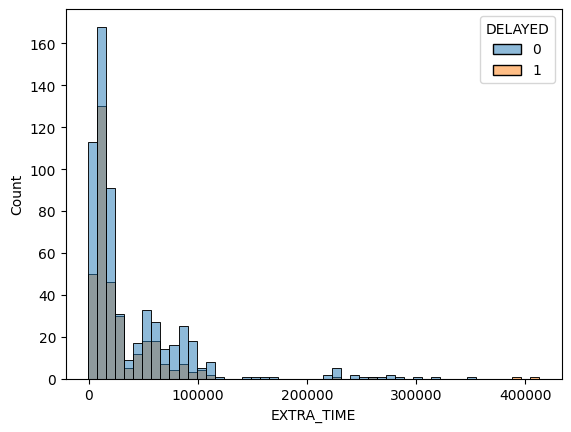

In [79]:
import seaborn as sns

# Plot the distribution of extra time by whether the delivery was delayed
sns.histplot(data=sample, x="EXTRA_TIME", hue="DELAYED", bins=50)

<Axes: xlabel='DELAYED', ylabel='EXTRA_TIME'>

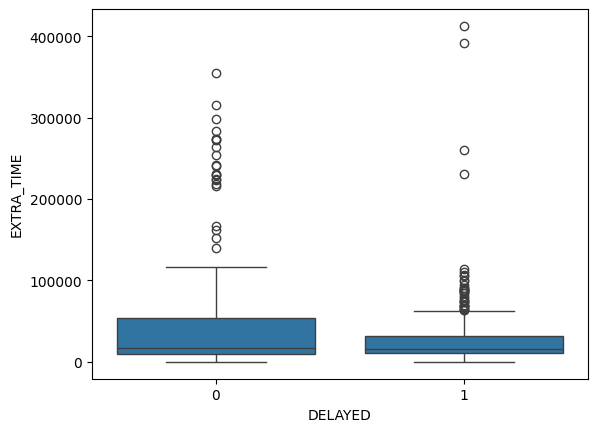

In [80]:

sns.boxplot(data=sample, x="DELAYED", y="EXTRA_TIME")


In [94]:
# Try logistic regression on extra time to predict whether the delivery will be delayed
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

X = sample[["EXTRA_TIME"]]
y = sample["DELAYED"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

# Cross validation
cross_val_score(model, X, y, cv=10, scoring="f1").mean()

np.float64(0.0)

There is not as much correlation between the extra time and whether the delivery is delayed as I would have expected. This variable may not be useful for predicting delays.